In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numba import jit

In [448]:
size = 20
T = 2.5
time = 100
#defining an array with 1s and -1s
def Ising_rand_array(size):
    rand_array = np.around(np.random.rand(size,size))
    #generates array with 0s and 1s
    for c in range(0,size):
        for r in range(0,size):
            #changes 0s to -1s
            if rand_array[r,c] == 0:
                rand_array[r,c] = -1
            else:
                rand_array[r,c] = rand_array[r,c]
    
    return rand_array
Ising_array = Ising_rand_array(size)
#generates random row and column indexes for the sim
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

In [545]:
def Boltz_flip(rand_col, rand_row, size, T, i, Ising_array_num):
    #checks if the boltzmann factor is greater than a random number between 0 and 1
    return np.random.rand(1) < np.e**(-delta_U(rand_row, rand_col, size, i, Ising_array_num)/T)
    
def delta_U(rand_row, rand_col, size, i, Ising_array_num):
    #checks if the change in energy would be negative
    flip_candidate = Ising_array_num[int(rand_row[i]),int(rand_col[i])]
    b = Ising_array_num[int((rand_row[i]+1)%size),int(rand_col[i])]
    t = Ising_array_num[int(rand_row[i]-1),int(rand_col[i])]
    l = Ising_array_num[int(rand_row[i]),int(rand_col[i]-1)]
    r = Ising_array_num[int(rand_row[i]),int((rand_col[i]+1)%size)]
    return 2*flip_candidate*(t+b+l+r)

def flip(rand_col, rand_row, size, T, time, Ising_array_num):
    #checks over the random dipoles and lets them flip 100 times
    #averageEnergy = 0
    for i in range(0, size*size):
        for t in range(0, time):
            if delta_U(rand_row, rand_col, size, i, Ising_array_num) <= 0:
                Ising_array_num[int(rand_row[i]),int(rand_col[i])] = -Ising_array_num[int(rand_row[i]),int(rand_col[i])]
            
            elif Boltz_flip(rand_col, rand_row, size, T, i, Ising_array_num) == True:
                Ising_array_num[int(rand_row[i]),int(rand_col[i])] = -Ising_array_num[int(rand_row[i]),int(rand_col[i])]
            
            #averageEnergy += average_Engergy(size, Ising_array_num)
            #return np.cumsum(Ising_array_num)
            
    return Ising_array_num#, averageEnergy
    #returns the changed Ising array

def average_Engergy(size, Ising_array_num):
    averageEngergy = 0
    for c in range(0,size):
        for r in range(0,size):
            #Take the sum of the spins of the neighbors and then decided the energy from that
            flip_candidate = Ising_array_num[r,c]
            b = Ising_array_num[(r+1)%size,c]
            t = Ising_array_num[r-1,c]
            l = Ising_array_num[r,c-1]
            r = Ising_array_num[r,(c+1)%size]
            if flip_candidate > 0:
                averageEngergy += -(b+t+l+r)
            elif flip_candidate < 0:
                averageEngergy += (b+t+l+r) 
    return averageEngergy/(size**2)

def total_magnetization(size, Ising_array_num):
    return np.sum(Ising_array_num)

# 8.26

-1.2


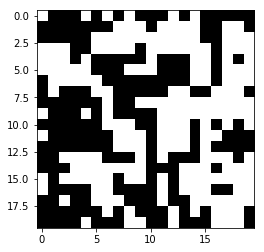

In [515]:
size = 20  
Ising_a = flip(rand_col, rand_row, size, T, time, Ising_array)
print(average_Engergy(size, Ising_a))
plt.imshow(Ising_a, cmap='gray')
plt.show()

In [266]:
T = 10 
time = 100
size = 20
Ising_array_1 = Ising_rand_array(size)
average_Engergy(size, Ising_array_1)
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

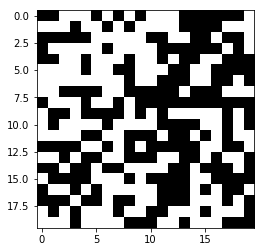

In [267]:
plt.imshow(flip(rand_col, rand_row, size, T, time, Ising_array_1), cmap='gray')
plt.show()

In [225]:
T = 10 
time = 100
size = 20
Ising_array_2 = Ising_rand_array(size)
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

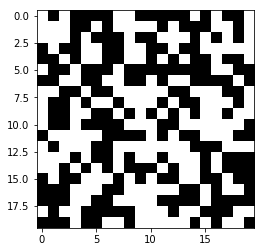

In [230]:
plt.imshow(flip(rand_col, rand_row, size, T, time, Ising_array_2), cmap='gray')
plt.show()

In [232]:
T = 5 
time = 100
size = 20
Ising_array_3 = Ising_rand_array(size)
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

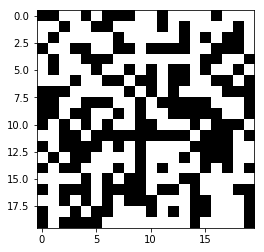

In [233]:
plt.imshow(flip(rand_col, rand_row, size, T, time, Ising_array_3), cmap='gray')
plt.show()

In [546]:
T = 4 
time = 100
size = 20
Ising_array_4 = Ising_rand_array(size)
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

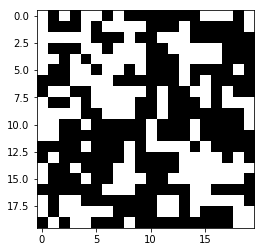

-54.0


In [569]:
plt.imshow(flip(rand_col, rand_row, size, T, time, Ising_array_4), cmap='gray')
plt.show()

In [581]:
T = 211
time = 100
size = 100
Ising_array_5 = Ising_rand_array(size)
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))

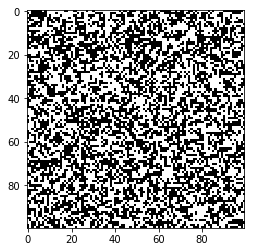

In [587]:
plt.imshow(flip(rand_col, rand_row, size, 10, time, Ising_array_5), cmap='gray')
plt.show()

# 8.27

In [589]:
size = 10
time = 100
subdivision = 100
rand_row = np.around((size-1)*np.random.rand(size*size))
rand_col = np.around((size-1)*np.random.rand(size*size))
average_U = np.zeros(subdivision)
Temp_scale = np.zeros(subdivision)
for i in range(0,subdivision):
    T = 4 - 4*i/subdivision
    Temp_scale[i] = T
    Ising_array_6 = Ising_rand_array(size)
    average_U[i] = average_Engergy(size, Ising_array_6)
    flip(rand_col, rand_row, size, T, time, Ising_array_6)

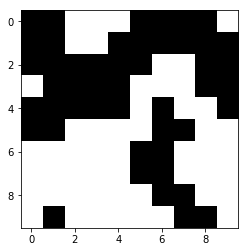

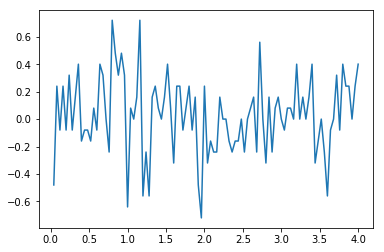

In [590]:
plt.imshow(Ising_array_6, cmap='gray')
plt.show()

plt.plot(Temp_scale, average_U)

# 8.28

In [591]:
flip(rand_col, rand_row, size, T, time, Ising_array_6)
print(total_magnetization(size, Ising_array_6))

4.0
